---
# Name of Method - Model 4
---
In this notebook, ...


## Results

---

### Importing necessary library

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay, balanced_accuracy_score, precision_recall_curve
from sklearn.svm import SVC 
from features import features

### Read data file

In [2]:
churn_df = pd.read_excel('../data/churn_cleaned_featEng.xlsx')
churn_df

,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Senior Citizen_Yes,Partner_Yes,Dependents_Yes,Internet Service_Fiber optic,Internet Service_No,...,Payment Method_Electronic check,Payment Method_Mailed check,Gender_Male,Phone Service_Yes,Multiple Lines_No phone service,Multiple Lines_Yes,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes
0,33.964131,118.272783,2,53.85,1,0,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0
1,34.059281,118.307420,2,70.70,1,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,0
2,34.048013,118.293953,8,99.65,1,0,0,1,1,0,...,1,0,0,1,0,1,0,1,0,1
3,34.062125,118.315709,28,104.80,1,0,1,1,1,0,...,1,0,0,1,0,1,0,1,0,1
4,34.039224,118.266293,49,103.70,1,0,0,1,1,0,...,0,0,1,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,34.341737,116.539416,72,21.15,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
7039,34.667815,117.536183,24,84.80,0,0,1,1,0,0,...,0,1,1,1,0,1,0,1,0,1
7040,34.559882,115.637164,72,103.20,0,0,1,1,1,0,...,0,0,0,1,0,1,0,1,0,1
7041,34.167800,116.864330,11,29.60,0,0,1,1,0,0,...,1,0,0,0,1,0,0,0,0,0


---

<center>
    
## Preparing data

</center>

---

### Separate X and y features

In [3]:
# Seperate X and y features
X = churn_df.drop(columns=['Churn Value'])
y = churn_df['Churn Value']

### Split dataset (training/testing)

In [4]:
# Separating the dataset into a training dataset (70%) and testing+validation (30%) dataset
X_train, X_test_validation, y_train, y_test_validation = train_test_split(X, y, train_size=0.7, random_state=5)

# Separating the testing+valisation dataset into a testing dataset (15%) and a validation dataset (15%) 
X_val, X_test, y_val, y_test = train_test_split(X_test_validation, y_test_validation, test_size=0.5, random_state=5)

### Converting data subset to dataframe 

In [5]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

### Scale X features

In [6]:
# Create instance of scaler
scaler = StandardScaler()

# Scale the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

---

<center>
    
## Support Vector Classifiers Model

</center>

---

### Find best parameters for model
---

**Create intance of model**

In [7]:
svm = SVC(random_state=25) 

**Setting parameters for the GridSearch**

In [8]:
# param_grid = { 'criterion' : ['gini', 'entropy', 'log_loss'],
#                'splitter' : ['best','random'],
#                'max_depth' : [3,5,8,10,15,20,40],
#                'class_weight': [{0: 0.1, 1: 1.9}],
#              }

param_grid = {'C':[0.001,0.01,.1], # first tried [0.01,0.1, 1], but best C was 0.01 # then tried [0.001,0.01, .01] best C was 0.001
              'kernel':['linear','rbf'],
              'gamma' : ['scale','auto'],
              'class_weight': ['balanced', {0: 1, 1: 1}, {0: 0.7, 1: 1.3}, {0: 0.5, 1: 1.5}, {0: 0.3, 1: 1.7}, {0: 0.1, 1: 1.9}],
             }

**Setting instance of GridSearchCV**

In [9]:
grid = GridSearchCV(svm, param_grid, scoring='f1')

**Train the models to find best parameters**

In [10]:
grid.fit(X_train_scaled,y_train)

GridSearchCV(estimator=SVC(random_state=25),
             param_grid={'C': [0.001, 0.01, 0.1],
                         'class_weight': ['balanced', {0: 1, 1: 1},
                                          {0: 0.7, 1: 1.3}, {0: 0.5, 1: 1.5},
                                          {0: 0.3, 1: 1.7}, {0: 0.1, 1: 1.9}],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='f1')

---
### Investigate best model's predictive features

---

In [11]:
grid.best_params_

{'C': 0.1, 'class_weight': {0: 0.7, 1: 1.3}, 'gamma': 'scale', 'kernel': 'rbf'}

In [12]:
grid.best_score_

np.float64(0.6438535322930984)

In [13]:
grid.n_features_in_

27

In [14]:
model = grid.best_estimator_

**Plot Decision Tree Arborescence**

In [15]:
# # Create figure and adjust size
# plt.figure(figsize=(50,50))

# # Plot decision tree
# plot_tree(model, feature_names=X_train.columns)

# # Save decision tree
# plt.savefig('../graph/DecisionTreeClassifier.png')

# # Show model
# plt.show()

---
### Get scores for the training dataset
---

**Make prediction on training dataset**

In [16]:
y_pred_train = grid.predict(X_train_scaled)

**Create Confusion Matrix**

In [17]:
cm = confusion_matrix(y_train, y_pred_train)
cm

array([[2931,  670],
       [ 355,  974]])

**Plot confusion matrix**

<Figure size 400x400 with 0 Axes>

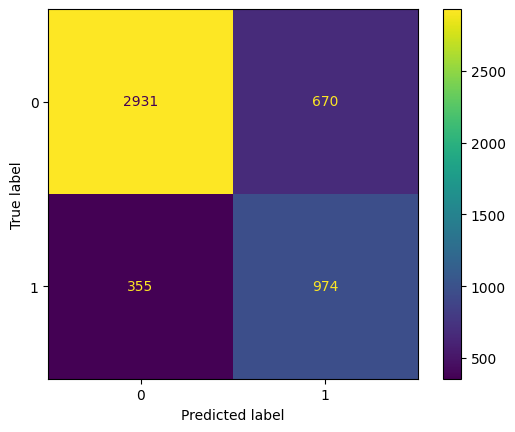

In [18]:
# Create figure and adjsut its size
plt.figure(figsize=(4,4))

# Create plot for Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=grid.classes_)

disp.plot()

# Show plot
plt.show()

**Print classification Report**

In [19]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85      3601
           1       0.59      0.73      0.66      1329

    accuracy                           0.79      4930
   macro avg       0.74      0.77      0.75      4930
weighted avg       0.81      0.79      0.80      4930



---

<center>
    
## Validation

</center>

---

**Run model on testing dataset**

In [20]:
y_pred_test = grid.predict(X_test_scaled)

**Create Confusion Matrix**

In [21]:
cm = confusion_matrix(y_test, y_pred_test)
cm

array([[623, 160],
       [ 81, 193]])

**Plot confusion matrix**

<Figure size 400x400 with 0 Axes>

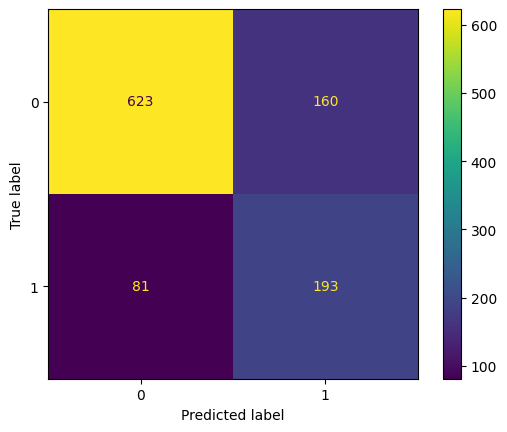

In [22]:
# Create figure and adjsut its size
plt.figure(figsize=(4,4))

# Create plot for Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=grid.classes_)

disp.plot()

# Show plot
plt.show()

**Print classification Report**

In [23]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       783
           1       0.55      0.70      0.62       274

    accuracy                           0.77      1057
   macro avg       0.72      0.75      0.73      1057
weighted avg       0.80      0.77      0.78      1057



In [24]:
balanced_accuracy_score(y_test,y_pred_test)

np.float64(0.7500186443680026)

In [25]:
precision_recall_curve(y_test,y_pred_test)

(array([0.25922422, 0.54674221, 1.        ]),
 array([1.        , 0.70437956, 0.        ]),
 array([0, 1]))

---

<center>
    
## Results

</center>

---

### Results

### Results

all = 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 
            'Internet Service', 
            'Online Security', 'Online Backup', 'Device Protection',
            'Tech Support', 'Contract', 'Paperless Billing', 'Payment Method',
            'Monthly Charges', 'Churn Value',

Training dataset (all+ lat/lon)
| Metric       | Precision | Recall | F1-Score | Support |
|-------------|-----------|-------|----------|--------|
| Class 0     | 0.89     | 0.82  | 0.86    | 4132   |
| Class 1     | 0.60     | 0.72  | 0.66    | 1502   |
| Accuracy    |          |       | 0.80    | 5634   |
| Macro Avg   | 0.74     | 0.77  | 0.76    | 5634   |
| Weighted Avg| 0.81     | 0.80  | 0.80    | 5634   |

test(all + lat/lon)
| Metric       | Precision | Recall | F1-Score | Support |
|-------------|-----------|-------|----------|--------|
| Class 0     | 0.88     | 0.79  | 0.84    | 504    |
| Class 1     | 0.59     | 0.74  | 0.65    | 201    |
| Accuracy    |          |       | 0.78    | 705    |
| Macro Avg   | 0.74     | 0.77  | 0.75    | 705    |
| Weighted Avg| 0.80     | 0.78  | 0.78    | 705    |